# classify fashion mnist dataset using LeNet

# Import Libraries

In [2]:
import numpy as np
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
# download fashion mnist dataset using keras.
from tensorflow.keras import datasets

In [4]:
# setting random seed so that initial value of random variable will be the same

In [5]:
from numpy.random import seed
seed(42)

In [6]:
# get fashion mnist data

In [7]:
fashion_mnist_dataset = datasets.fashion_mnist
(train_images_dataset, train_labels), (test_images_dataset, test_labels) = fashion_mnist_dataset.load_data()

In [8]:
# list of unique categories in fashion mnist
categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
# dimensions of training data
print("dimensions of training data: {shape}".format(shape=train_images_dataset.shape))
print("dimensions of training data: {shape}".format(shape=train_labels.shape))

# dimensions of test set
print("dimensions of test set: {shape}".format(shape=test_images_dataset.shape))
print("dimensions of test set: {shape}".format(shape=test_labels.shape))

dimensions of training data: (60000, 28, 28)
dimensions of training data: (60000,)
dimensions of test set: (10000, 28, 28)
dimensions of test set: (10000,)


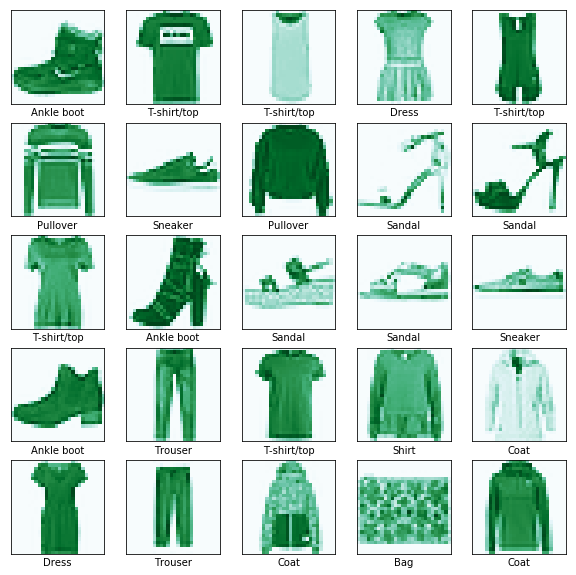

In [10]:
# diplay random images from training dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_dataset[i], cmap="BuGn")
    plt.xlabel(categories[train_labels[i]])
plt.show()

In [11]:
# preprocessing (standardization) dataset
train_data_mean = np.mean(train_images_dataset[0])
train_data_stdev = np.std(train_images_dataset[0])
train_data = (train_images_dataset - train_data_mean)/train_data_stdev
test_data = (test_images_dataset - train_data_mean)/train_data_stdev

In [12]:
no_rows = 28
no_cols = 28
no_classes = 10

In [14]:
#One-hot encoding the labels
from keras.utils.np_utils import to_categorical
trainlabels = to_categorical(train_labels)
testlabels = to_categorical(test_labels)

In [15]:
# reshape data to fit in model
traindata = train_data.reshape(60000, no_rows, no_cols, 1)
testdata = test_data.reshape(10000, no_rows, no_cols, 1)

# Build Model

In [16]:
# LeNet Model, few changes have been made, ReLU activation is used instead of sigmoid/tanh, 
# max pooling is used instead of avg pooling

In [18]:
model = Sequential()
#Conv Layer 1
model.add(Conv2D(filters = 6, kernel_size =(5, 5), strides = (1, 1), activation = 'relu', input_shape = (28,28,1), padding='same'))
#Pooling layer 1
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
#Conv Layer 2
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
#Pooling Layer 2
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
#Flatten
model.add(Flatten())
#Fully connected layer 1
model.add(Dense(units = 120, activation = 'relu'))
#Fully connected layer 2
model.add(Dense(units = 84, activation = 'relu'))
#Output Layer 
model.add(Dense(no_classes, activation = 'softmax'))

In [21]:
model.compile(optimizer = 'adam', loss=keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [23]:
train_model = model.fit(traindata, trainlabels, batch_size=64, epochs=5, verbose=1, validation_data=(testdata, testlabels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 33s 546us/sample - loss: 0.4591 - acc: 0.8340 - val_loss: 0.3403 - val_acc: 0.8788
Epoch 2/5
60000/60000 [==============================] - 33s 555us/sample - loss: 0.2923 - acc: 0.8920 - val_loss: 0.2985 - val_acc: 0.8890
Epoch 3/5
60000/60000 [==============================] - 32s 536us/sample - loss: 0.2461 - acc: 0.9071 - val_loss: 0.2877 - val_acc: 0.8954
Epoch 4/5
60000/60000 [==============================] - 33s 542us/sample - loss: 0.2204 - acc: 0.9174 - val_loss: 0.2845 - val_acc: 0.8992
Epoch 5/5
60000/60000 [==============================] - 35s 591us/sample - loss: 0.1908 - acc: 0.9281 - val_loss: 0.2848 - val_acc: 0.9023


In [24]:
print(train_model.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


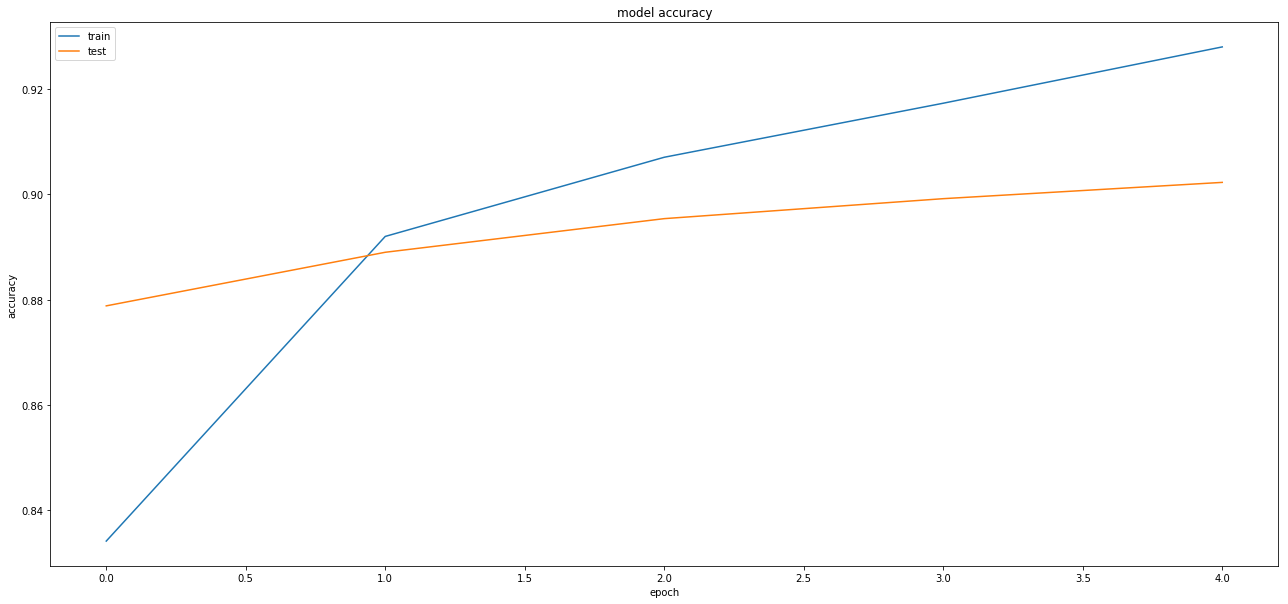

In [25]:
plt.figure(figsize=(22, 10))
plt.plot(train_model.history['acc'])
plt.plot(train_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.ylim((0.9,.94))
plt.legend(['train', 'test'], loc='upper left')
plt.show()

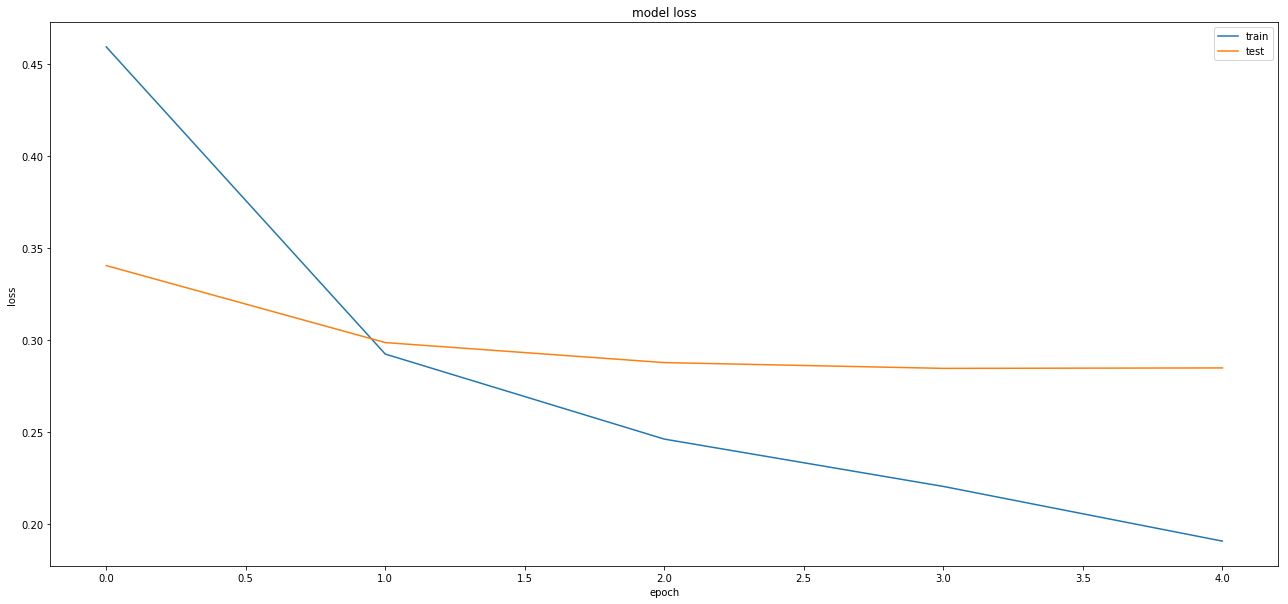

In [26]:
plt.figure(figsize=(22, 10))
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.ylim((0,.3))
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [27]:
def create_trace(x,y,ylabel,color):
    trace = go.Scatter(
        x = x,y = y,
        name=ylabel,
        marker=dict(color=color),
        mode = "markers+lines",
        text=x
    )
    return trace

def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    
    iplot(fig, filename='accuracy-loss')

    

In [28]:
plot_accuracy_and_loss(train_model)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [29]:
#get the predictions for the test data
predicted_classes = model.predict_classes(testdata)
y_true = test_labels

In [30]:
p = predicted_classes
y = y_true
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [31]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9023
Incorrect predicted classes: 977


In [32]:
target_names = ["Class {} ({}) :".format(i,categories[i]) for i in range(no_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.86      0.86      0.86      1000
    Class 1 (Trouser) :       0.99      0.98      0.99      1000
   Class 2 (Pullover) :       0.85      0.80      0.82      1000
      Class 3 (Dress) :       0.91      0.92      0.92      1000
       Class 4 (Coat) :       0.76      0.93      0.84      1000
     Class 5 (Sandal) :       0.99      0.97      0.98      1000
      Class 6 (Shirt) :       0.80      0.65      0.72      1000
    Class 7 (Sneaker) :       0.95      0.96      0.96      1000
        Class 8 (Bag) :       0.97      0.98      0.98      1000
 Class 9 (Ankle boot) :       0.96      0.97      0.97      1000

            avg / total       0.90      0.90      0.90     10000



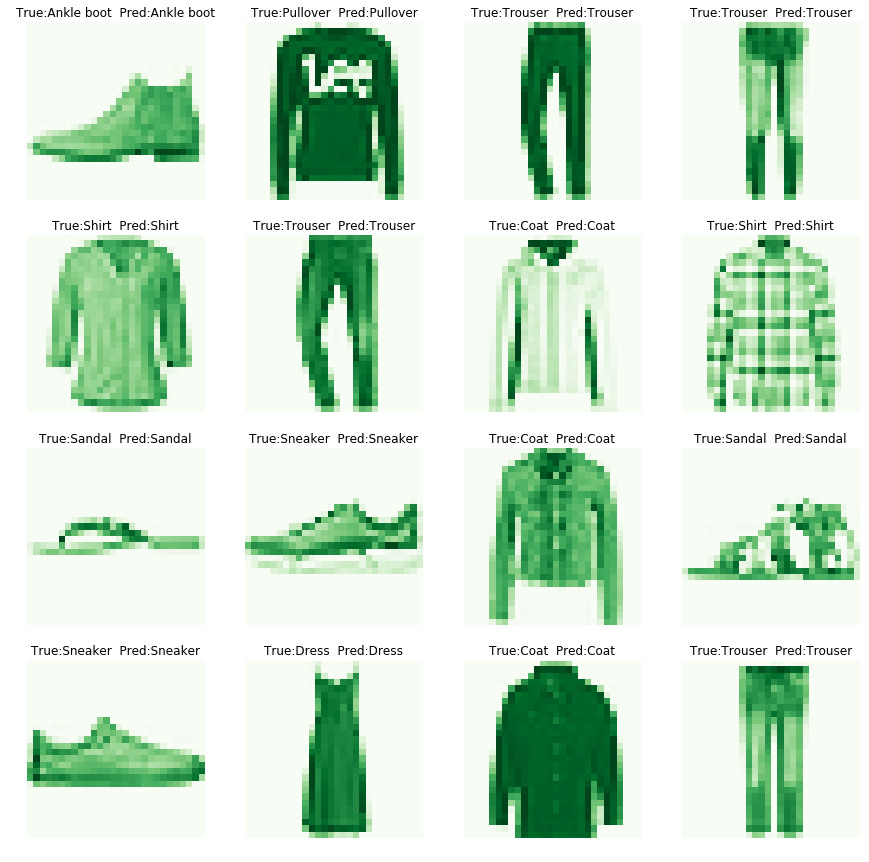

In [33]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(15,15))

    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(testdata[indx].reshape(no_rows,no_cols), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(categories[y_true[indx]],categories[predicted_classes[indx]]))
    plt.show()    
    
plot_images(correct, "Greens")

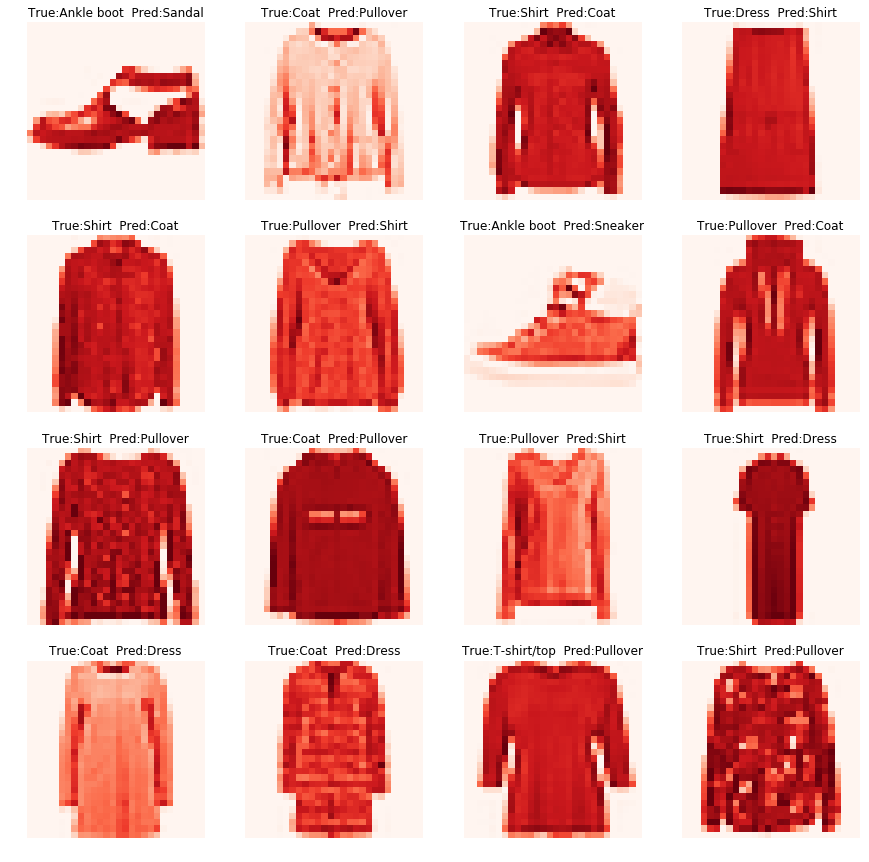

In [34]:
plot_images(incorrect, "Reds")